# How to read data from varius file formats

some of the most basic things noone ever treaches you is how to actually access your data in various formats. This notebook shows a couple of examples on how to read data from a number of sources. Feel free to edit this notebook with more methods that you have worked with.

In [1]:
#import relevant packages
#from urllib.request import urlretrieve
from urllib2 import urlopen
import matplotlib.pyplot as plt
import pandas as pd
from sqlalchemy import create_engine
import numpy as np
from astropy.io import fits
import urllib
import h5py
import pickle

%matplotlib inline

# importing files from the internet

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

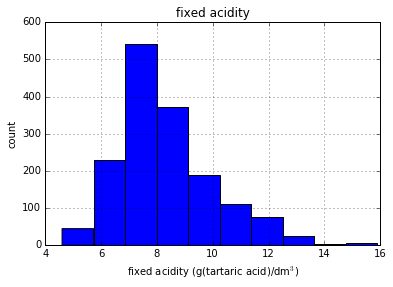

In [2]:

# Assign url of file: url

url ='https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'

# Save file locally

testfile = urllib.URLopener()
testfile.retrieve(url, "winequality-red.csv")

# or use wget
#file_name = wget.download(url)


# Read file into a DataFrame and print its head
df = pd.read_csv('winequality-red.csv', sep=';')
print(df.head())


pd.DataFrame.hist(df.ix[:, 0:1])
plt.xlabel('fixed acidity (g(tartaric acid)/dm$^3$)')
plt.ylabel('count')
plt.show()


# same thing with csv or txt file 


In [17]:
example_sheet='cereal.csv'
example_file='cereal.txt'


xl = pd.read_csv(example_sheet)
x2 = pd.read_csv(example_sheet)
# akternatively you can use read_csv
print (xl.keys())

# pandas lets you specify seperators as well as number of colums and filling nans 
                #pd.read_csv(file, sep='\t', comment='#', na_values='Nothing')
    
    

# textfiles
data = np.loadtxt(example_file, delimiter='\t', skiprows=1, usecols=[4,5])


Index([u'name', u'mfr', u'type', u'calories', u'protein', u'fat', u'sodium',
       u'fiber', u'carbo', u'sugars', u'potass', u'vitamins', u'shelf',
       u'weight', u'cups', u'rating'],
      dtype='object')


# Chunks

In [21]:
chunksize = 10 ** 6
for chunk in pd.read_csv(example_file,sep='\t', chunksize=chunksize):
    print len(chunk) # print len can be replaced with any process that you would want to use
    
#similarly using read_table

for chunk in pd.read_table(example_file,sep='\t', chunksize=chunksize):
    len(chunk)

77


# reading fits files

In [22]:
filename= 'example.fits'
hdulist = fits.open(filename)
final_data = hdulist[1].data

IOError: [Errno 2] No such file or directory: 'example.fits'

In [ ]:
final_data.columns()
final_data[1]

# writing and reading HDF5 files


In [23]:

data_matrix = np.random.uniform(-1, 1, size=(10, 3))

# Write data to HDF5
data_file = h5py.File('file.hdf5', 'w')
data_file.create_dataset('group_name', data=data_matrix)
data_file.close()

In [24]:

filename_hdf = 'file.hdf5'
f = h5py.File(filename_hdf, 'r')

# List all groups
print("Keys: %s" % f.keys())
a_group_key = list(f.keys())[0]

# Get the data
data = list(f[a_group_key])

Keys: [u'group_name']


# SQL databases
assuming you want to read them into python
also have a look at the databases talk sarah gave (27/04/18)

In [25]:
# make sql database with pandas
engine = create_engine('PATH')
pd.to_sql('new_database', engine)


ValueError: invalid literal for int() with base 10: 'memory:'

In [ ]:
pd.read_sql("SELCT * FROM new_database", engine)

# Reading pickled files
I didn't have a pickled file ready so we will make a mock file to start with 

In [26]:
your_data = {'foo': 'bar'} #makes dictionary

#alternatively use pandas to make and read pickled files

# Store data (serialize)
with open('filename.pickle', 'wb') as handle:
    pickle.dump(your_data, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Load data (deserialize)
with open('filename.pickle', 'rb') as handle:
    unserialized_data = pickle.load(handle)

print(unserialized_data)

{'foo': 'bar'}


# Reading JSON files